In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temps = [948, 1024, 1100, 1200, "all"]
df_csv = {}
df_centerline = {}
for t in temps:
    if t == 948:
        df_csv[t] = pd.read_csv("../knp_verification/refined_x3/fhr_assem_moltres_csv.csv")
        df_centerline[t] = pd.read_csv("../knp_verification/refined_x3/fhr_assem_moltres_csv_flux_centerline_0003.csv")
    elif t == 1024:
        df_csv[t] = pd.read_csv("./123pcm_1024K/fhr_assem_moltres_csv.csv")
        df_centerline[t] = pd.read_csv("./123pcm_1024K/fhr_assem_moltres_csv_flux_centerline_0003.csv")
    elif t == 1100:
        df_csv[t] = pd.read_csv("../knp_verification/150pcm_1100K/fhr_assem_moltres_csv.csv")
        df_centerline[t] = pd.read_csv("../knp_verification/150pcm_1100K/fhr_assem_moltres_csv_flux_centerline_0003.csv") 
    elif t == 1200:        
        df_csv[t] = pd.read_csv("./134pcm_1200K/fhr_assem_moltres_csv.csv")
        df_centerline[t] = pd.read_csv("./134pcm_1200K/fhr_assem_moltres_csv_flux_centerline_0003.csv")     
    elif t == "all":
        df_csv[t] = pd.read_csv("./all_temp/fhr_assem_moltres_csv.csv")
        df_centerline[t] = pd.read_csv("./all_temp/fhr_assem_moltres_csv_flux_centerline_0003.csv")
 

In [3]:
ave_temp = {}
ave_temp_diff = {}
max_temp = {}
max_temp_diff = {}
ave_temp_all = df_csv['all']["temp_ave"][3]
max_temp_all = df_csv['all']["temp_max"][3]
for t in temps:
    ave_temp[t] = round(df_csv[t]["temp_ave"][3],3)
    ave_temp_diff[t] = round(df_csv[t]["temp_ave"][3]-ave_temp_all,3)
    max_temp[t] = round(df_csv[t]["temp_max"][3],3)
    max_temp_diff[t] = round(df_csv[t]["temp_max"][3]-max_temp_all,3)
data = [ave_temp, ave_temp_diff, max_temp, max_temp_diff]

In [4]:
df_comparison = pd.DataFrame(data, index =['ave_temp', 'ave_temp_diff', 'max_temp', 'max_temp_diff'])

In [5]:
df_comparison = df_comparison.transpose()

In [6]:
df_comparison

,ave_temp,ave_temp_diff,max_temp,max_temp_diff
948,1004.708,0.341,1187.658,1.299
1024,1004.676,0.310,1187.148,0.788
1100,1004.622,0.256,1186.094,-0.266
1200,1004.539,0.172,1185.359,-1.000
all,1004.366,0.000,1186.359,0.000


948 0.044
1024 0.041
1100 0.046
1200 0.047
all 0.0


Text(0.5, 1.0, 'AHTR Slab Temperature Distribution')

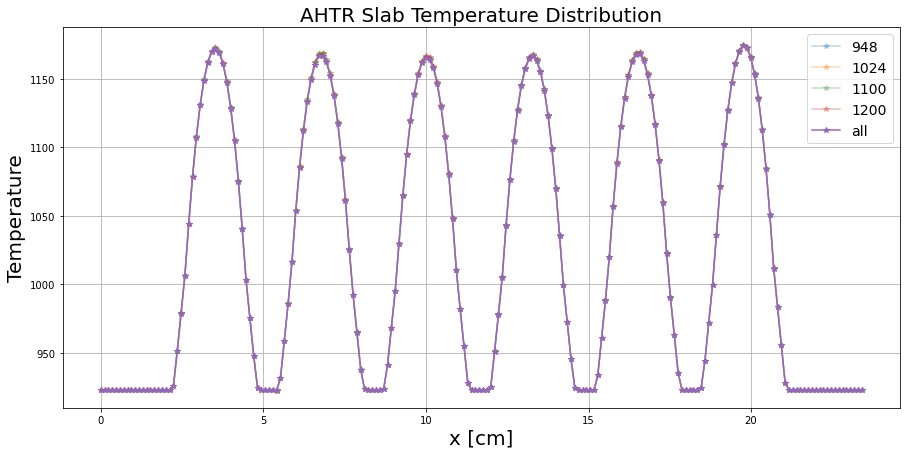

In [7]:
all_slab_temp = np.array(df_centerline['all']['temp'])
fig, ax = plt.subplots(figsize=(15,7))
for t in temps:
    if t == 'all':
        alpha = 1
    else:
        alpha = 0.3
    ax.plot(df_centerline[t]['y'], df_centerline[t]['temp'], marker='*', label=t, alpha=alpha)
    try:
        #print(t, round(np.mean(abs(all_slab_temp - np.array(df_centerline[t]['temp']))),3))
        print(t, round(np.linalg.norm(all_slab_temp - np.array(df_centerline[t]['temp']))/200,3))
    except:
        print(t)
        pass
ax.grid()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=14, bbox_to_anchor = [1.0, 1.0])
#ax.set_ylim(1165, 1174)
ax.set_xlabel("x [cm]", fontsize=20)
ax.set_ylabel("Temperature", fontsize=20)
ax.set_title('AHTR Slab Temperature Distribution', fontsize=20)